# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objectives:
The dealership aims to understand the factors that affect used car prices to make data-driven decisions for their used car inventory which can sell quickly with high profitably. 

#### Analytics Objectives:
1. Identify key features that significantly influence the price of used cars.  
2. Determine the patterns and trends in the used car market.  
3. Develop a predictive model to estimate the market value of used cars based on their attributes.

#### Business Questions:
1. What car features (make, model, year, mileage, condition, etc.) most strongly correlate with price?  
2. Is there a significant difference in price based on the type of cars?
3. What is the depreciation rate for different car brands or models?
4. How do seasonal factors influence used car prices?
4. Understand what factors make a car more or less expensive

#### Goal:
The goal is to build the prediction model about used car pricing, which involves. The model should be able to predict/estimate the price for which the car should be sold.

#### Risks and Assumptions:
There is a risk that the model developed may not generalize well to cars outside of the dataset, especially if the market conditions change or if the dataset is biased.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd

# Loading dataset and printing the unique values.

vehicles_df = pd.read_csv('data/vehicles.csv')

vehicles_df.head()

vehicles_df.info()

vehicles_df.describe()

for column in vehicles_df.select_dtypes(include=['object']).columns:
    print(f'Unique values in "{column}":', vehicles_df[column].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2]:
# Get the count of missing values and the percentage of missing values
missing_values_count = vehicles_df.isnull().sum()

missing_values_percentage = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100

# Building and sorting the DataFrame
missing_values_df = pd.DataFrame({
    'missing_values_count': missing_values_count,
    'missing_values_percentage': missing_values_percentage
})

missing_values_df.sort_values(by='missing_values_percentage', ascending=False)

,missing_values_count,missing_values_percentage
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179


#### Plots for EDA
Using log scale due to wide range of prices


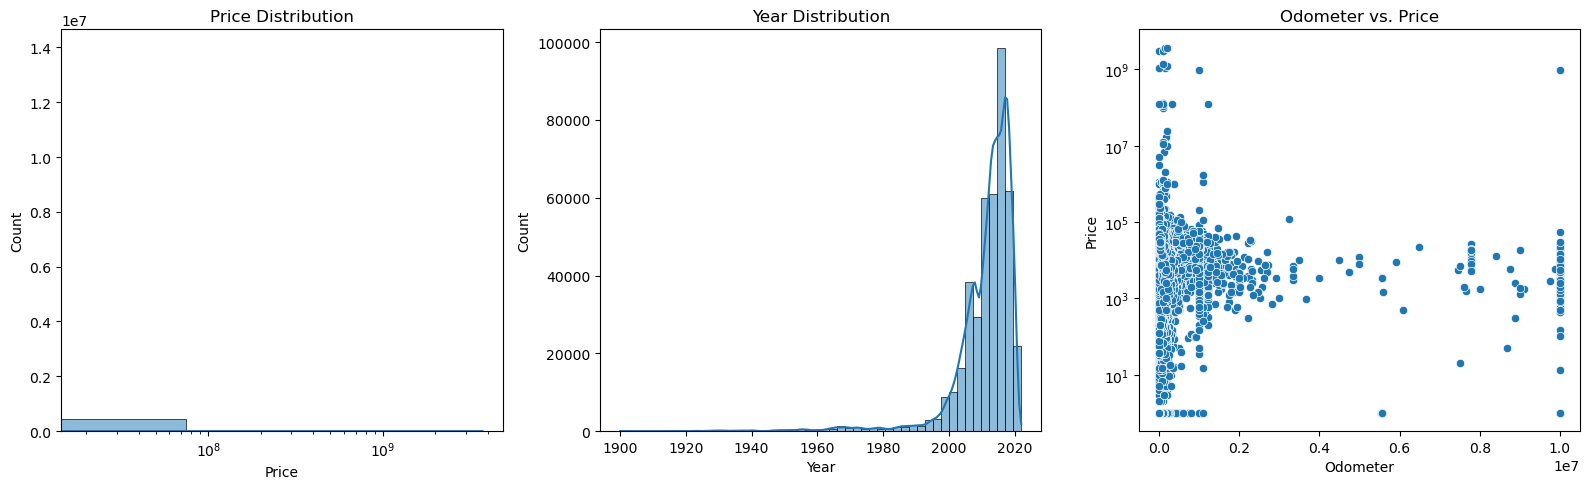

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making 3 plots to understand the data better.
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(vehicles_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xscale('log')

plt.subplot(1, 3, 2)
sns.histplot(vehicles_df['year'].dropna(), bins=50, kde=True)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.scatterplot(x='odometer', y='price', data=vehicles_df)
plt.title('Odometer vs. Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.yscale('log')

plt.tight_layout()
plt.show()


### Price Distribution: 
The histogram shows that the price variable is highly skewed with a long tail, suggesting that there are some very high-priced vehicles in the dataset. A logarithmic scale is used to better visualize the wide range of prices.  

### Year Distribution: 
The distribution of the year column shows that most of the vehicles in the dataset are from recent years.  

### Odometer vs. Price: 
The scatter plot between odometer readings and price shows a potential negative correlation, where vehicles with higher mileage tend to be priced lower. This is also expected as higher mileage generally correlates with more usage and potentially more wear and tear, which can lower a vehicle's value. The price axis is on a logarithmic scale to better display the wide range of values.

In [4]:
# Get minimum and maximum values for each numerical column
numerical_min_max = pd.DataFrame({
    'min_value': vehicles_df.select_dtypes(include=['int64', 'float64']).min(),
    'max_value': vehicles_df.select_dtypes(include=['int64', 'float64']).max()
})

numerical_min_max

,min_value,max_value
id,7.207408e+09,7.317101e+09
price,0.000000e+00,3.736929e+09
year,1.900000e+03,2.022000e+03
odometer,0.000000e+00,1.000000e+07


##### The dataset has been successfully loaded, and we have some initial insights:

1. The dataset has 426,880 records and 18 columns.  
2. We have both numerical and categorical values in the data set.
3. Some columns have a significant number of missing values (e.g., size, cylinders,condition, VIN, drive, paint_color, type ).  
4. The target variable (price), has values ranging from 0 to over 3.7 billion, which suggests the presence of outliers or incorrect entries.
5. The dataset appears to have a wide range of models and unique values in other categorical columns, which indicates high cardinality and should be addressed.  


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [5]:
missing_values_df

,missing_values_count,missing_values_percentage
id,0,0.000000
region,0,0.000000
price,0,0.000000
year,1205,0.282281
manufacturer,17646,4.133714
model,5277,1.236179
condition,174104,40.785232
cylinders,177678,41.622470
fuel,3013,0.705819
odometer,4400,1.030735


In [6]:
from sklearn.model_selection import train_test_split

# Handling of missing values
#1. If the column has more than 30% of the data as missing, the drop the column.
#2. If the numerical column has more than <= 30% of the data as missing, then impute the missing values by median.
#3. If the categorical column has more than <= 30% of the data as missing, then impute the missing values by mode.

columns_to_drop = missing_values_df[missing_values_df['missing_values_percentage'] > 30].index
vehicles_dropped_df = vehicles_df.drop(columns=columns_to_drop)

#vehicles_dropped_df

numerical_columns = vehicles_dropped_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = vehicles_dropped_df.select_dtypes(include=['object']).columns

for column in numerical_columns:
    if vehicles_dropped_df[column].isnull().sum() > 0:
        vehicles_dropped_df[column].fillna(vehicles_dropped_df[column].median(), inplace=True)

for column in categorical_columns:
    if vehicles_dropped_df[column].isnull().sum() > 0:
        vehicles_dropped_df[column].fillna(vehicles_dropped_df[column].mode()[0], inplace=True)


# Function to remove outliers (Using the 5th and 95th percentiles)
def remove_outliers(df, column_names, lower_quantile=0.05, upper_quantile=0.95):
    for column_name in column_names:
        quantile_cutoffs = df[column_name].quantile([lower_quantile, upper_quantile])
        df = df[
            (df[column_name] >= quantile_cutoffs.iloc[0]) &
            (df[column_name] <= quantile_cutoffs.iloc[1])
        ]
    return df


# Remove outliers from price and the odometer
data_cleaned = remove_outliers(vehicles_dropped_df,['price', 'odometer'])

data_cleaned.info()

data_cleaned.shape



<class 'pandas.core.frame.DataFrame'>
Int64Index: 365091 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            365091 non-null  int64  
 1   region        365091 non-null  object 
 2   price         365091 non-null  int64  
 3   year          365091 non-null  float64
 4   manufacturer  365091 non-null  object 
 5   model         365091 non-null  object 
 6   fuel          365091 non-null  object 
 7   odometer      365091 non-null  float64
 8   title_status  365091 non-null  object 
 9   transmission  365091 non-null  object 
 10  type          365091 non-null  object 
 11  state         365091 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 36.2+ MB


(365091, 12)

In [7]:
# Label Encoding for Categorical Variables because I need to generate the linear regression model.
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].astype('category').cat.codes
    
data_cleaned.shape 

pd.set_option('display.max_columns', None)

categorical_columns



Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object')

In [8]:
data_cleaned.head()

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,7222695916,277,6000,2013.0,13,11729,2,85548.0,0,0,9,3
1,7218891961,105,11900,2013.0,13,11729,2,85548.0,0,0,9,2
2,7221797935,111,21000,2013.0,13,11729,2,85548.0,0,0,9,9
3,7222270760,396,1500,2013.0,13,11729,2,85548.0,0,0,9,19
4,7210384030,131,4900,2013.0,13,11729,2,85548.0,0,0,9,27


In [9]:
# Feature Engineering
# Creating a 'year_old' feature to replace 'year'
current_year = pd.to_datetime('now', utc=True).year
data_cleaned['year_old'] = current_year - data_cleaned['year']

# Now drop the year column
data_cleaned.drop('year', axis=1, inplace=True)




In [10]:
# Normalizing Numerical Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['price', 'odometer', 'year_old']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Data Splitting
X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292072, 11), (73019, 11), (292072,), (73019,))

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fitting a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Evaluating the model
lr_train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
lr_test_rmse = mean_squared_error(y_test, test_predictions, squared=False)




In [12]:
from sklearn.ensemble import RandomForestRegressor

# Fitting a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Evaluating the model
rf_train_rmse = mean_squared_error(y_train, rf_train_predictions, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_test_predictions, squared=False)



### Changing n_estimators=10
Trying one more time with n_estimators=10

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training set
rf_train_predictions = rf_model.predict(X_train)

# Predict on the test set
rf_test_predictions = rf_model.predict(X_test)

# Calculate RMSE for the training set
rf_train_rmse_10 = mean_squared_error(y_train, rf_train_predictions, squared=False)

# Calculate RMSE for the test set
rf_test_rmse_10 = mean_squared_error(y_test, rf_test_predictions, squared=False)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [14]:
print(f"Linear Regression Training RMSE: {lr_train_rmse}")
print(f"Linear Regression Test RMSE: {lr_test_rmse}")

Linear Regression Training RMSE: 0.22194148489117008
Linear Regression Test RMSE: 0.2217080374178609


### Interpretation
The training(Training RMSE: 0.22194148489117008) and test RMSE(Test RMSE: 0.2217080374178609) for linear regression model are very close and this indicates that the model is working well and not overfitting to the training data

In [15]:
print(f"Random Forest Training RMSE: {rf_train_rmse}")
print(f"Random Forest Test RMSE: {rf_test_rmse}")

Random Forest Training RMSE: 0.04619485970618412
Random Forest Test RMSE: 0.12322428923574509


### Interpretation
The training RMSE(Training RMSE: 0.04619485970618412) is very low, suggesting that the model has captured the patterns in the training data.  
The test RMSE(Test RMSE: 0.12322428923574509) is higher than the training RMSE, which is expected due to the model encountering unseen data in the test set.

In [16]:
print(f'Random Forest Training RMSE(n_estimators=10): {rf_train_rmse_10}')
print(f'Random Forest Test RMSE(n_estimators=10): {rf_test_rmse_10}')

Random Forest Training RMSE(n_estimators=10): 0.055892570339785834
Random Forest Test RMSE(n_estimators=10): 0.13049220134395173


In [17]:
# Now get the feature importances for the random forest with 100 n_estimators
importances = rf_model.feature_importances_


feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importances)

         feature  importance
5       odometer    0.306603
3          model    0.168474
10      year_old    0.114914
0             id    0.070023
2   manufacturer    0.065642
8           type    0.063002
7   transmission    0.058158
1         region    0.052777
9          state    0.052563
4           fuel    0.044353
6   title_status    0.003490


Below are the important features:

##### odometer (30.66% importance):   
The car's mileage is the most significant predictor, suggesting that lower mileage cars are typically valued higher.
##### model (16.85% importance):   
The make and model of the car are also strong predictors, indicating that certain models are consistently more or less expensive.
##### year_old (11.49% importance):   
The age of the car is important, with newer cars likely being more expensive.
#####  manufacturer (6.56% importance):   
The brand of the car affects its price, with some brands commanding higher prices.

The remaining features contribute less to the model's predictions. In summary, the model finds that a car's value is most strongly influenced by how much it's been driven, its make and model, and its age.

#### Linear Regression:

Training RMSE: 0.2219 Test RMSE: 0.2217 Easy to understand the impact of each feature on the target variable and it's a low Computation Time. Since the training and test errors are very close this model generalizes well

####  Random Forest (n_estimators=100):   
Training RMSE: 0.0462 Test RMSE: 0.1232 Random Forest models are difficult to understand and kind of a black box. The computation time is high but since the model has a much lower RMSE on both training and test sets compared to linear regression the performance will be good.

#### Random Forest (n_estimators=10):   
Training RMSE: 0.0559 Test RMSE: 0.1305 As said before Random Forest models are difficult to understand and this model computation time is better than 100 trees but higher than the linear regression. The performance should be better than linear regression but lower than the model with n_estimators=100.

To get the best model the Random forest with 100 trees is the best performing model but if the model will be used in a real-time system where prediction speed is important, the linear regression or smaller Random Forest may be preferable. If it will be used in where prediction speed is less critical, a more complex Random Forest could be used.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Used Car Value Insights Report

#### Executive Summary
The most significant factors determining a used car's value are its mileage, model, and age.

#### Introduction
To identify key factors that affect car prices to help dealers in managing their used car inventory.

#### Methodology
We used the historical data and a machine learning model(random forest) to find out the most important attributes which impact the car prices and also to get the predicted value using those attributes.

#### Key Findings

1. Mileage: Cars with lower mileage tend to sell for higher prices.
2. Model: Certain car models are more valuable than others.  
3. Vehicle Age: Newer cars generally sold for higher prices but some older models can also be sold for high price based on the vehicle condition and the desirability.

#### Recommendations for Inventory Management

1. Prioritize acquiring low-mileage cars.  
2. Focusing on the models that retain value.
3. Balance the inventory with a mix of new and desirable older vehicles.

